In [1]:
import pygmt
import geopandas as gpd
import pandas as pd
from shapely.geometry import box
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
fig_dir = Path('../paper/figures')
shape_dir = Path('../data/shapefiles')
data_dir = Path('../data')
dikes   = gpd.read_file(shape_dir / "dikes_cut.shp")
geology = gpd.read_file(shape_dir / "geology_cut.shp")

In [4]:
# Define the study area
region = [np.float64(-42.639999),
          np.float64(-41.900009),
          np.float64(-22.599991),
          np.float64(-22.000015)] 
bbox = box(*region)

In [5]:
def categorize_lithotypes(sigla):
    if sigla.startswith(tuple(['PP3rl', 'NP3bp'])):  # PP3rl --> Granitoides de Arco Magmático Orosiniano / NP3bp --> Paragnaisses
        return 'CBT'  # Cabo Frio Domain
    elif sigla.startswith(tuple(['NP12itma', 'NP12iteu'])):  # Bacias de Margem Passiva (paragnaisses)
        return 'IG'  # Italva group
    elif sigla.startswith(tuple(['NPsf'])):  # Bacias de Margem Ativa (paragnaisses)
        return 'SFG'  # São Fidelis group
    elif sigla.startswith(tuple(['NP23'])):  # Granitoides de Arco Magmático (paragnaisses)
        return 'RNC'  # Rio Negro complex
    elif sigla.startswith(tuple(['NP3_gamma'])):  # Granitoides syn-colisionais (Orogenese Rio Doce)
        return 'RDO'  # Rio Doce orogeny
    elif sigla.startswith(tuple(['C_cortado_4O1'])):  # Plutons pós-colisionais (Suíte Nova Friburgo)
        return 'PCP'  # Post-collisional plutons
    elif sigla.startswith(tuple(['Q'])):  # Depósitos Quaternários
        return 'Q'
    elif sigla.startswith('K2'): 
        return 'K2'   # Alkaline intrusions
    else:
        return 'IG'


geology['category'] = geology['SIGLA_UNID'].apply(categorize_lithotypes)


In [6]:
topography = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
topography = topography.rename({'lon': 'longitude', 'lat': 'latitude'})

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == 'Brazil']

In [7]:
data = pd.read_csv(data_dir/"rio-de-janeiro-magnetic.csv")
data.head()

longitude   latitude  total_field_anomaly_nT  altitude_m  line_number  \
0 -42.639984 -22.290527                  -16.56      151.49         2800   
1 -42.639969 -22.291397                  -43.47      162.46         2800   
2 -42.639954 -22.292267                  -65.38      170.69         2800   
3 -42.639938 -22.293152                  -74.29      173.43         2800   
4 -42.639923 -22.294022                  -67.20      170.08         2800   

      easting_m    northing_m  deriv_up  deriv_east  deriv_north  
0 -4.393928e+06 -2.342215e+06  0.159488    0.045283    -0.096695  
1 -4.393926e+06 -2.342311e+06  0.118291    0.053503    -0.125651  
2 -4.393925e+06 -2.342407e+06  0.065451    0.062132    -0.143214  
3 -4.393923e+06 -2.342505e+06  0.003259    0.071041    -0.146666  
4 -4.393922e+06 -2.342602e+06 -0.063629    0.079413    -0.132554

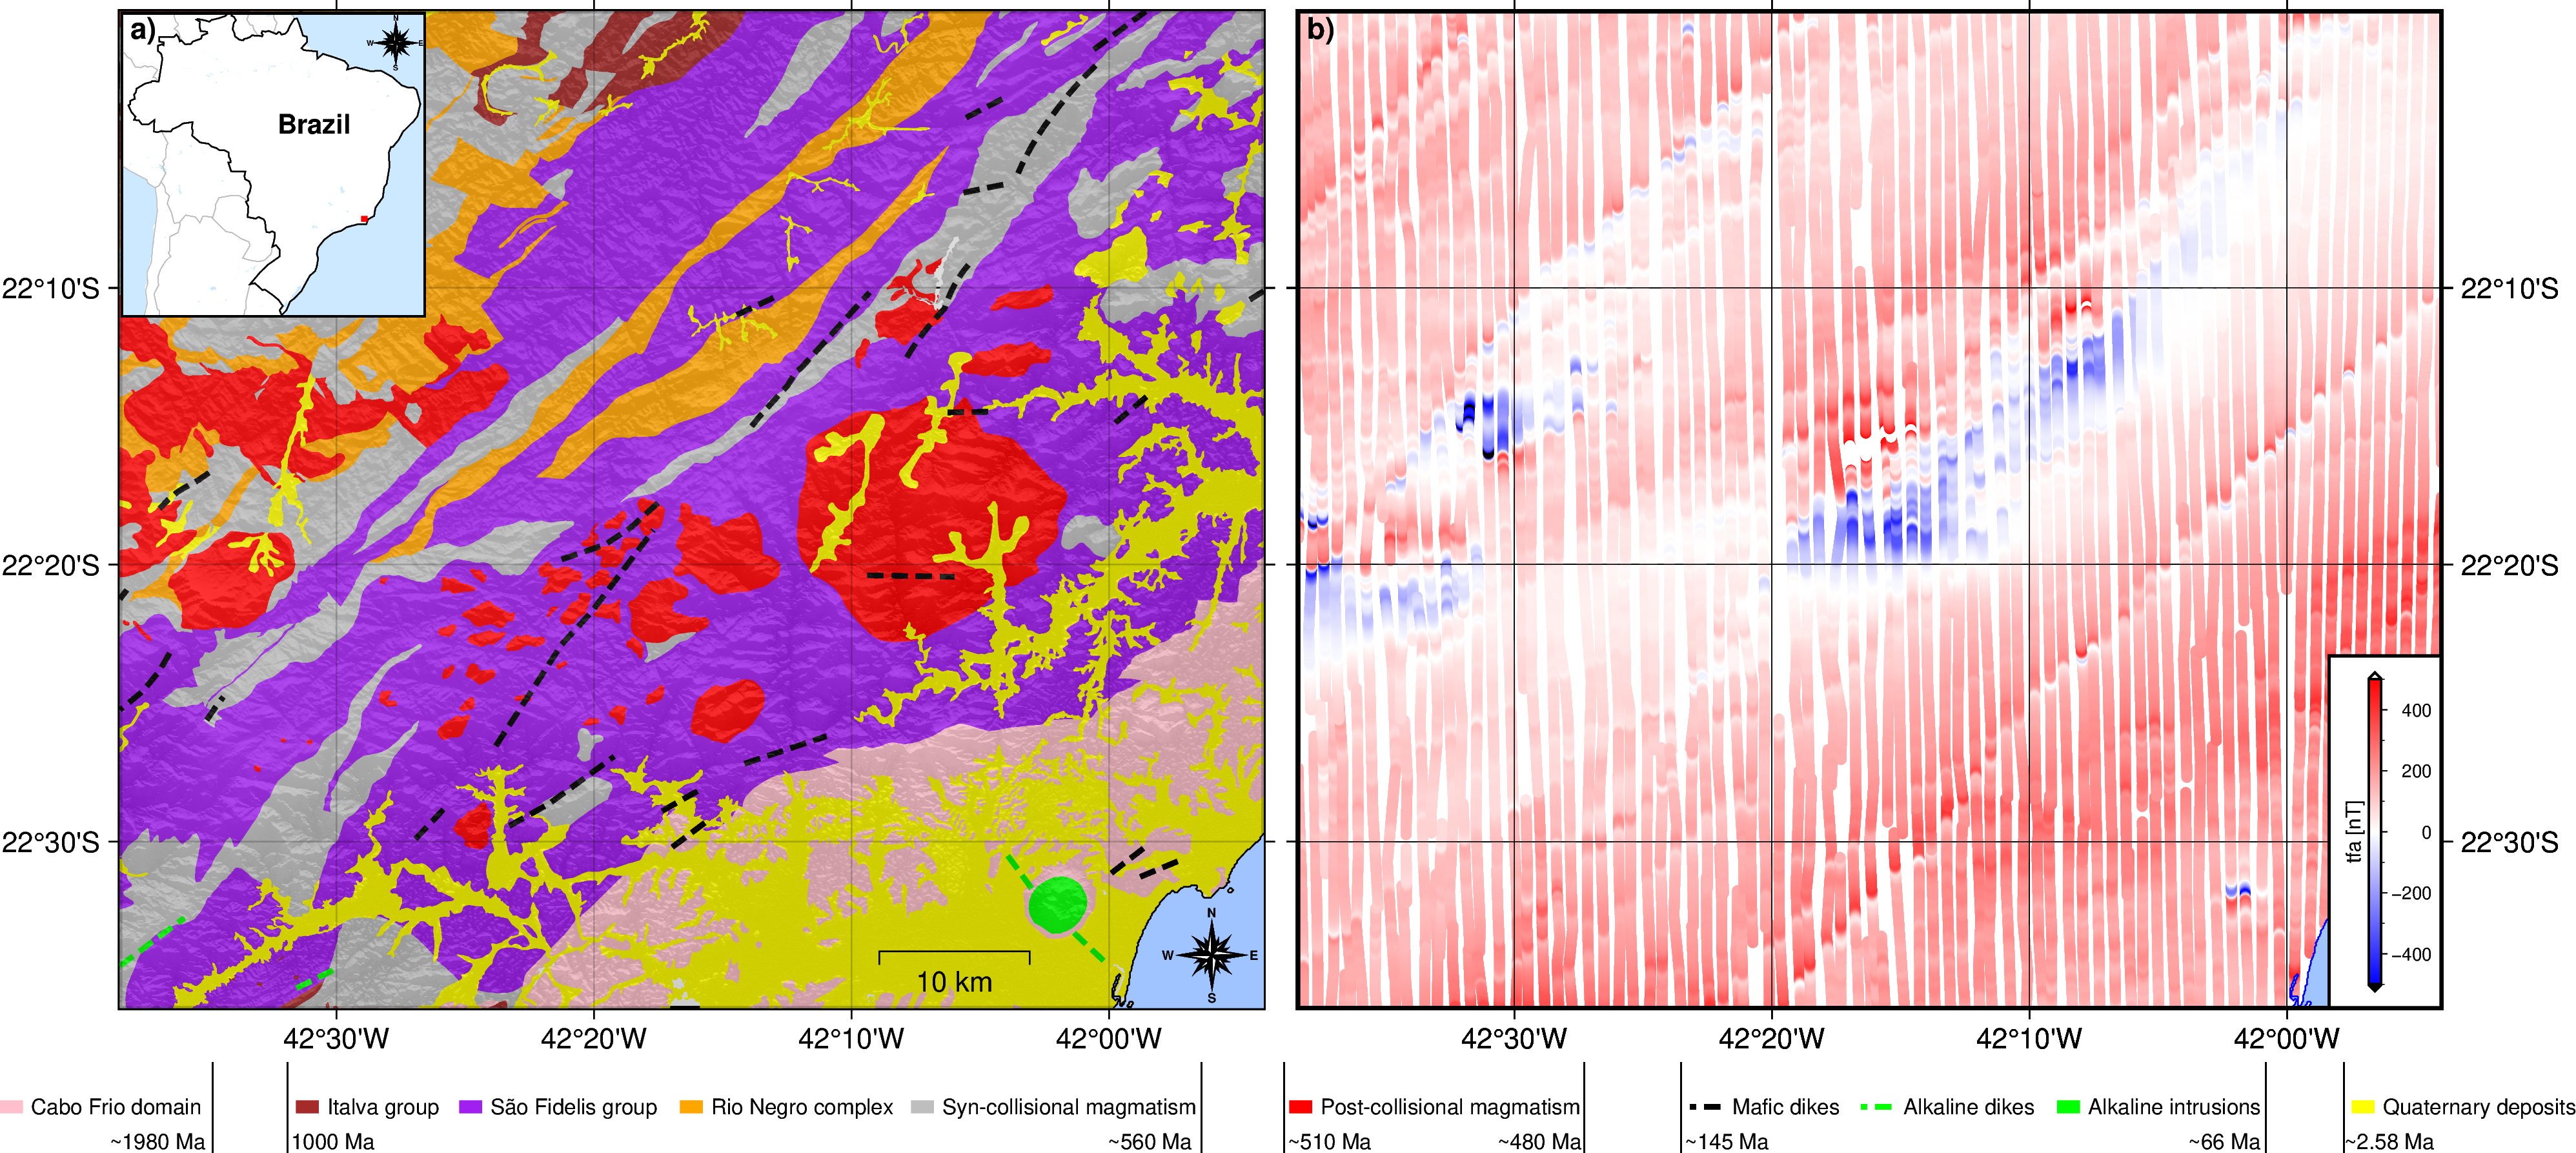

In [8]:
# Criar a figura PyGMT
fig = pygmt.Figure()
# Criar os subplots: 1 linha e 2 colunas
with fig.subplot(nrows=1, ncols=2, figsize=("30c", "15c")):
    
    # Primeiro subplot: Mapa com geologia e intrusões
    with fig.set_panel(panel=0):  # Primeiro subplot
        pygmt.config(MAP_FRAME_TYPE = 'plain', MAP_GRID_PEN_PRIMARY=0.5)
        frame = ["WSne", "xag", "yag"]
        fig.basemap(region=region, projection="M15c", frame=frame)
        
        # Plotando Cabo Frio terrane
        pos = -7.5
        category, color, label = 'CBT', 'pink', 'Cabo Frio domain'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")
        pos = -7.0
        diff = 3.0
        # Plotando Paragneisses (Italva group)
        pos += diff
        category, color, label = 'IG', 'brown', 'Italva group'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")
        
        diff = 2.5
        # Plotando Paragneisses (São Fidelis group)
        pos += diff
        category, color, label = 'SFG', 'purple', 'São Fidelis group'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")

        diff = 3.0
        # Plotando Orthognaisses (Rio Negro complex)
        pos += diff
        category, color, label = 'RNC', 'orange', 'Rio Negro complex'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")
        
        diff = 3.5
        # Plotando Syn-collisional magmatism
        pos += diff
        category, color, label = 'RDO', 'gray', 'Syn-collisional magmatism'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")

        diff = 5.0
        # Plotando Post-collisional magmatism
        pos += diff
        category, color, label = 'PCP', 'red', 'Post-collisional magmatism'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")
        
        diff = 9.5
        # Plotando Alkaline intrusions
        pos += diff
        category, color, label = 'K2', 'green', 'Alkaline intrusions'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")

        diff = 4
        # Plotando Quaternary sediments
        pos += diff
        category, color, label = 'Q', 'yellow', 'Quaternary deposits'
        file = geology[geology["category"] == category]
        fig.plot(data=file, fill=color, label=label, projection="M15c")
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")

        diff = -9.2
        # Plotando o dique da Serra do Mar
        pos += diff
        category, color, label = 'Rocha Básica', 'black', 'Mafic dikes'
        file = dikes[dikes["CLASSE_DIQ"] == category]
        file = file[file.geometry.notnull()]  # Certifica-se de que há geometria válida
        fig.plot(data=file, pen=f"2p,{color},6_3:0p", projection="M15c", label=label)
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")
        
        diff = 2.4
        # Plotando os diques Alcalinos
        pos += diff
        category, color, label = 'Rocha alcalina', 'green', 'Alkaline dikes'
        file = dikes[dikes["CLASSE_DIQ"] == category]
        file = file[file.geometry.notnull()]  # Certifica-se de que há geometria válida
        fig.plot(data=file, pen=f"2p,{color},6_3:0p", projection="M15c", label=label)
        with pygmt.config(FONT_ANNOT="8p"):
            fig.legend(position=f"jTC+o{pos}c/16c")

        
        # # Adicionar relevo
        fig.grdimage(
            topography,
            projection="M15c",
            cmap="gray",
            frame=frame,
            shading='+a-345',
            transparency=80,
        
        )
        # Adicionar a cor do oceano
        fig.coast(shorelines="1/0.5", water="#A0C4FF", map_scale="g-42.1/-22.57+w10k", projection="M15c")
        fig.basemap(rose="jBR+w0.85c+f3+l", projection="M15c")
        with fig.inset(position="jTL+w4.0c+o0.01c/0.01c", margin=0):
        
            fig.basemap(region=[-75, -34, -34, 5], frame=True)
        
            colfill = 'white'
            fig.coast(region=[-75, -34, -34, 5], 
                      land='white',
                      resolution = "h", 
                      frame = ["WSne", "xa", "ya"],#'a',
                      water="#CDE9FF", #"#A0C4FF"
                      # projection="M15c"
             )
            
            fig.plot(data=world, pen="0.25p,gray")
            fig.plot(data=brazil, pen="0.5p,black")
            
            x = [region[0], region[1], region[1], region[0], region[0]]
            y = [region[2], region[2], region[3], region[3], region[2]]
            
            fig.plot(
                x=x,  # Coordenadas x do quadrado
                y=y,  # Coordenadas y do quadrado
                pen="0.2p,red",  # Define a cor e espessura da borda do quadrado
                fill='red'  # Preenchimento vazio para apenas contornar
            )
        

            fig.text(text="Brazil", x=-49, y=-10, font="10p,Helvetica-Bold,black")
            fig.basemap(rose="jTR+w0.5c+f3+l", frame=True)
        
    # fig.text(text="    ______", x=-42.555, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    # fig.text(text="~1500 Ma", x=-42.625, y=-22.67, font="8p,Helvetica,black", no_clip=True)

    fig.text(text="    ______", x=-42.58, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text="~1980 Ma", x=-42.615, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-42.530, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" 1000 Ma", x=-42.500, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.920, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" ~560 Ma", x=-41.955, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.865, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" ~510 Ma", x=-41.835, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.665, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" ~480 Ma", x=-41.695, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.600, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" ~145 Ma", x=-41.570, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.210, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text="  ~66 Ma", x=-41.240, y=-22.67, font="8p,Helvetica,black", no_clip=True)
    
    fig.text(text="    ______", x=-41.158, y=-22.66, font="10p,Helvetica-Bold,black", angle=90, no_clip=True)
    fig.text(text=" ~2.58 Ma", x=-41.128, y=-22.67, font="8p,Helvetica,black", no_clip=True)

    fig.text(text="a)", x=-42.625, y=-22.01, font="11p,Helvetica-Bold,black", projection="M15c")
    # Segundo subplot: Mapa do Brasil
    with fig.set_panel(panel=1):  # Segundo subplot
        frame = ["wSnE", "xag", "yag"]
        pygmt.config(MAP_FRAME_TYPE='plain')
        # pygmt.config(MAP_GRID_PEN_PRIMARY='0.05p')
        # pygmt.config(MAP_GRID_PEN_SECONDARY='0.05p')
        pygmt.config(MAP_DEFAULT_PEN='0.05p,blue')
        fig.basemap(region=region, projection="M15c", frame=frame)
        
        pygmt.makecpt(cmap="polar", series=[-500,500])
        fig.plot(
            x=data.longitude,
            y=data.latitude,
            fill=data.total_field_anomaly_nT,
            cmap=True,
            style="c4.0p",
            # style="h0.15c",
            projection="M15c",
            # frame=frame,
        )
        fig.coast(shorelines="1/0.5", water="#A0C4FF", projection="M15c", frame=frame)
        with pygmt.config(FONT_ANNOT="13p"):
            fig.colorbar(
                frame='af+ltfa [nT]',
                position="jBR+o0.34c/-0.85c+w4.0c+ml+e",  # Posição ajustada com label no topo
                # position="jTR+h",  # Posição ajustada com label no topo
                box="+gwhite+p1p"  # Caixa branca com borda
            )

        fig.text(text="b)", x=-42.625, y=-22.01, font="11p,Helvetica-Bold,black", projection="M15c")

fig.savefig(fig_dir/'geological-map.png', dpi=300)
fig.show(width=1200)
